In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data_path = r"C:\Users\varun\MySeleniumProject\customdata.csv"
df = pd.read_csv(data_path)

# Check for missing and infinite values in the dataset
print("Missing values in the dataset:")
print(df.isnull().sum())
print("\nInfinite values in the dataset:")
print((df == float('inf')).sum())



Missing values in the dataset:
Time spent on page                     0
Average mouse speed                    0
Average time spent on fields           0
Average interval between fields        0
Average mouse angle change             0
Average variance of x-axis clicks      0
Jitter count                           0
Tremors count                          0
Backspace count                        0
Repeated key count                   215
isHuman                                0
dtype: int64

Infinite values in the dataset:
Time spent on page                   0
Average mouse speed                  0
Average time spent on fields         0
Average interval between fields      0
Average mouse angle change           0
Average variance of x-axis clicks    0
Jitter count                         0
Tremors count                        0
Backspace count                      0
Repeated key count                   0
isHuman                              0
dtype: int64


In [2]:
df.shape[0]

2048

In [3]:
# Check the unique values in the 'isHuman' column
print(df['isHuman'].unique())


[False  True]


In [4]:
# Ensure 'isHuman' column is converted to string type before using .str accessor
df['isHuman'] = df['isHuman'].astype(str)

# Clean the column by stripping any extra spaces and standardizing case
df['isHuman'] = df['isHuman'].str.strip()  # Remove extra spaces
df['isHuman'] = df['isHuman'].str.capitalize()  # Standardize case (True, False)

# Now map 'True' to 1 and 'False' to 0
df['isHuman'] = df['isHuman'].map({'True': 1, 'False': 0})

# Check unique values again to verify
print(df['isHuman'].unique())


[0 1]


In [5]:
df.shape[0]

2048

In [8]:
# Drop rows with any null values
df_cleaned = df.dropna()

# Check the number of rows after dropping null values
print(f"Number of rows after dropping null values: {df_cleaned.shape}")


Number of rows after dropping null values: (1833, 11)


In [9]:
df_cleaned.shape

(1833, 11)

In [10]:
df_cleaned['isHuman'].unique

<bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
2043    1
2044    1
2045    1
2046    1
2047    1
Name: isHuman, Length: 1833, dtype: int64>

In [11]:
# Prepare the data (Features and Target)
X = df_cleaned[['Time spent on page', 'Average mouse speed', 'Average time spent on fields', 
        'Average interval between fields', 'Average mouse angle change', 
        'Average variance of x-axis clicks', 'Jitter count', 'Tremors count', 
        'Backspace count', 'Repeated key count']]  # Features
y = df_cleaned['isHuman']  

In [12]:
X.shape

(1833, 10)

In [11]:
y.shape


(1833,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_test.shape

(550, 10)

In [17]:
X_train.shape

(1283, 10)

In [18]:
y_test.shape

(550,)

In [19]:
y_train.shape

(1283,)

In [22]:
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [23]:
# Make predictions on the test set
y_pred = model1.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00       237

    accuracy                           1.00       550
   macro avg       1.00      1.00      1.00       550
weighted avg       1.00      1.00      1.00       550



In [25]:
from sklearn.model_selection import cross_val_score

# Use 5-fold cross-validation
cross_val_scores = cross_val_score(model1, X, y, cv=5)

# Print average cross-validation score
print(f"Cross-validation accuracy: {cross_val_scores.mean() * 100:.2f}%")


Cross-validation accuracy: 100.00%


In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_ * 100:.2f}%")


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 100.00%


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
y_pred = model1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Human", "Human"], yticklabels=["Not Human", "Human"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

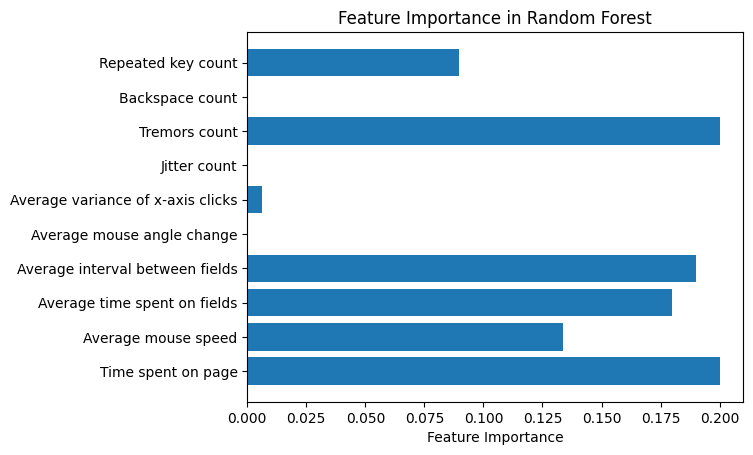

In [26]:
import matplotlib.pyplot as plt

# Plot feature importances
feature_importances = model1.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.show()


In [30]:
import pandas as pd

# Example input data (1 row) in a dictionary format
new_data = {
    'Time spent on page': [22.67],  # Example value
    'Average mouse speed': [13.75],  # Example value
    'Average time spent on fields': [22.47],  # Example value
    'Average interval between fields': [22.47],  # Example value
    'Average mouse angle change': [89.24],  # Example value
    'Average variance of x-axis clicks': [0.1],  # Example value
    'Jitter count': [0],  # Example value
    'Tremors count': [174],  # Example value
    'Backspace count': [1],  # Example value
    'Repeated key count': [0]  # Example value
}

# Convert the dictionary to a DataFrame (1 row of data)
new_data_df = pd.DataFrame(new_data)

# Ensure any necessary preprocessing is applied here
# Example: if 'isHuman' column is in the new data, you don't need to map it
# We can predict without 'isHuman' since it is the target

# Predict using the trained RandomForest model
prediction = model1.predict(new_data_df)

# Output the result (1 = Human, 0 = Bot)
print(f"Prediction: {'Human' if prediction[0] == 1 else 'Bot'}")


Prediction: Human


In [31]:
from joblib import dump

# Assuming `model` is the trained model you want to save
dump(model1, "randomforest_model.joblib")


['randomforest_model.joblib']

In [32]:
import joblib

# Assuming your model is trained and stored in 'model'
joblib.dump(model1, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [33]:
import pandas as pd

# Example input data (1 row) in a dictionary format
new_data = {
    'Time spent on page': [22.67],  # Example value
    'Average mouse speed': [13.75],  # Example value
    'Average time spent on fields': [22.47],  # Example value
    'Average interval between fields': [22.47],  # Example value
    'Average mouse angle change': [89.24],  # Example value
    'Average variance of x-axis clicks': [0.1],  # Example value
    'Jitter count': [0],  # Example value
    'Tremors count': [174],  # Example value
    'Backspace count': [1],  # Example value
    'Repeated key count': [0]  # Example value
}

# Convert the dictionary to a DataFrame (1 row of data)
new_data_df = pd.DataFrame(new_data)

# Ensure any necessary preprocessing is applied here
# Example: if 'isHuman' column is in the new data, you don't need to map it
# We can predict without 'isHuman' since it is the target

# Predict using the trained RandomForest model
prediction = model1.predict(new_data_df)

# Output the result (1 = Human, 0 = Bot)
print(f"Prediction: {'Human' if prediction[0] == 1 else 'Bot'}")


Prediction: Human


In [34]:
import pandas as pd

# Example input data (1 row) in a dictionary format
new_data = {
    'Time spent on page': [2.67],  # Example value
    'Average mouse speed': [0.75],  # Example value
    'Average time spent on fields': [0.47],  # Example value
    'Average interval between fields': [0.47],  # Example value
    'Average mouse angle change': [893.24],  # Example value
    'Average variance of x-axis clicks': [0.1],  # Example value
    'Jitter count': [0],  # Example value
    'Tremors count': [0],  # Example value
    'Backspace count': [1],  # Example value
    'Repeated key count': [0]  # Example value
}

# Convert the dictionary to a DataFrame (1 row of data)
new_data_df = pd.DataFrame(new_data)

# Ensure any necessary preprocessing is applied here
# Example: if 'isHuman' column is in the new data, you don't need to map it
# We can predict without 'isHuman' since it is the target

# Predict using the trained RandomForest model
prediction = model1.predict(new_data_df)

# Output the result (1 = Human, 0 = Bot)
print(f"Prediction: {'Human' if prediction[0] == 1 else 'Bot'}")


Prediction: Bot


In [35]:
import pandas as pd

# Example input data (1 row) in a dictionary format
new_data = {
    'Time spent on page': [2.67],  # Example value
    'Average mouse speed': [0.75],  # Example value
    'Average time spent on fields': [0.47],  # Example value
    'Average interval between fields': [0.47],  # Example value
    'Average mouse angle change': [893.24],  # Example value
    'Average variance of x-axis clicks': [0.1],  # Example value
    'Jitter count': [0],  # Example value
    'Tremors count': [0],  # Example value
    'Backspace count': [1],  # Example value
    'Repeated key count': [0]  # Example value
}

# Convert the dictionary to a DataFrame (1 row of data)
new_data_df = pd.DataFrame(new_data)

# Ensure any necessary preprocessing is applied here
# Example: if 'isHuman' column is in the new data, you don't need to map it
# We can predict without 'isHuman' since it is the target

# Predict using the trained RandomForest model
prediction = model1.predict(new_data_df)

# Output the result (1 = Human, 0 = Bot)
print(f"Prediction: {'Human' if prediction[0] == 1 else 'Bot'}")


Prediction: Bot


In [22]:
import pandas as pd

# Example input data (1 row) in a dictionary format
new_data = {
    'Time spent on page': [22.67],  # Example value
    'Average mouse speed': [15.75],  # Example value
    'Average time spent on fields': [12.47],  # Example value
    'Average interval between fields': [12.47],  # Example value
    'Average mouse angle change': [809.24],  # Example value
    'Average variance of x-axis clicks': [0.1],  # Example value
    'Jitter count': [0],  # Example value
    'Tremors count': [174],  # Example value
    'Backspace count': [1],  # Example value
    'Repeated key count': [0]  # Example value
}

# Convert the dictionary to a DataFrame (1 row of data)
new_data_df = pd.DataFrame(new_data)

# Ensure any necessary preprocessing is applied here
# Example: if 'isHuman' column is in the new data, you don't need to map it
# We can predict without 'isHuman' since it is the target

# Predict using the trained RandomForest model
prediction = model1.predict(new_data_df)

# Output the result (1 = Human, 0 = Bot)
print(f"Prediction: {'Human' if prediction[0] == 1 else 'Bot'}")


Prediction: Human
